# **Importing Libraries**


In [ ]:
from textblob import TextBlob
from wordcloud import wordcloud
import pandas as pd
import numpy as np
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings

warnings.filterwarnings('ignore')

# **Adding Tesla Twitter data CSV File**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving tesla_merged.csv to tesla_merged.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['tesla_merged.csv']))

In [ ]:
df = pd.read_csv ("tesla_merged.csv")

df.head()

,Datetime,Text
0,2020-05-31 23:57:24+00:00,"Trade #Stocks, #ETF and #Options on #Webull! O..."
1,2020-05-31 23:56:26+00:00,Your #free #stock is waiting for you! Join #Ro...
2,2020-05-31 23:35:46+00:00,Quick Update on $TSLA - Wave 4 triangle has co...
3,2020-05-31 23:00:24+00:00,"#TSLA knocks out @AlamedaCounty. Finally, #Tes..."
4,2020-05-31 21:25:27+00:00,Added some $SPCE Friday - want to build a larg...


In [ ]:
df = df.dropna()
df.head()

,Datetime,Text
0,2020-05-31 23:57:24+00:00,"Trade #Stocks, #ETF and #Options on #Webull! O..."
1,2020-05-31 23:56:26+00:00,Your #free #stock is waiting for you! Join #Ro...
2,2020-05-31 23:35:46+00:00,Quick Update on $TSLA - Wave 4 triangle has co...
3,2020-05-31 23:00:24+00:00,"#TSLA knocks out @AlamedaCounty. Finally, #Tes..."
4,2020-05-31 21:25:27+00:00,Added some $SPCE Friday - want to build a larg...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75569 entries, 0 to 75568
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Datetime  75569 non-null  object
 1   Text      75569 non-null  object
dtypes: object(2)
memory usage: 1.7+ MB


In [ ]:
df.Text = df.Text.str.lower()
df.head()

,Datetime,Text
0,2020-05-31 23:57:24+00:00,"trade #stocks, #etf and #options on #webull! o..."
1,2020-05-31 23:56:26+00:00,your #free #stock is waiting for you! join #ro...
2,2020-05-31 23:35:46+00:00,quick update on $tsla - wave 4 triangle has co...
3,2020-05-31 23:00:24+00:00,"#tsla knocks out @alamedacounty. finally, #tes..."
4,2020-05-31 21:25:27+00:00,added some $spce friday - want to build a larg...


## **Data Preprocessing**

In [ ]:
df.Text = df.Text.apply(lambda x: re.split('https:\/\/.*', str(x))[0])  #remove urls
df.Text = df.Text.apply(lambda x: re.sub(r'@\w+', '', str(x)))   #remove mentions
df.Text = df.Text.apply(lambda x: re.sub(r'&[a-z]+;', '', str(x))) #remove html characters
df.Text = df.Text.apply(lambda x: re.sub(r'[^\w\s]', '', str(x)))
df.head()

,Datetime,Text
0,2020-05-31 23:57:24+00:00,trade stocks etf and options on webull open an...
1,2020-05-31 23:56:26+00:00,your free stock is waiting for you join robinh...
2,2020-05-31 23:35:46+00:00,quick update on tsla wave 4 triangle has comp...
3,2020-05-31 23:00:24+00:00,tsla knocks out finally tesla reopened with o...
4,2020-05-31 21:25:27+00:00,added some spce friday want to build a larger...


In [ ]:
df['Text'] = df['Text'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,Datetime,Text
0,2020-05-31 23:57:24+00:00,trade stocks options webull open account free ...
1,2020-05-31 23:56:26+00:00,your free stock waiting join robinhood well bo...
2,2020-05-31 23:35:46+00:00,quick update tsla wave triangle completed tesl...
3,2020-05-31 23:00:24+00:00,tsla knocks finally tesla reopened with withou...
4,2020-05-31 21:25:27+00:00,added some spce friday want build larger size ...


Removing English keywords

In [ ]:
tokenized_tweet = df['Text'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [trade, stocks, options, webull, open, account...
1    [your, free, stock, waiting, join, robinhood, ...
2    [quick, update, tsla, wave, triangle, complete...
3    [tsla, knocks, finally, tesla, reopened, with,...
4    [added, some, spce, friday, want, build, large...
Name: Text, dtype: object

In [ ]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [trade, stock, option, webul, open, account, f...
1    [your, free, stock, wait, join, robinhood, wel...
2    [quick, updat, tsla, wave, triangl, complet, t...
3    [tsla, knock, final, tesla, reopen, with, with...
4    [ad, some, spce, friday, want, build, larger, ...
Name: Text, dtype: object

In [ ]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
df['Text'] = tokenized_tweet
df.head()

,Datetime,Text
0,2020-05-31 23:57:24+00:00,trade stock option webul open account free sto...
1,2020-05-31 23:56:26+00:00,your free stock wait join robinhood well both ...
2,2020-05-31 23:35:46+00:00,quick updat tsla wave triangl complet tesla re...
3,2020-05-31 23:00:24+00:00,tsla knock final tesla reopen with without per...
4,2020-05-31 21:25:27+00:00,ad some spce friday want build larger size wor...


Sorting Data Datewise

In [ ]:
#sorting the data datewise
df1 = df.sort_values(['Datetime'])
df1.head()

,Datetime,Text
10805,2020-01-01 00:56:57+00:00,trade decad number go long faang stock begin d...
10804,2020-01-01 01:24:41+00:00,hour chart group instrument avail member view
10803,2020-01-01 02:04:14+00:00,commun team 2020 bring even more spectacular i...
10802,2020-01-01 04:20:49+00:00,tsla tsla just would have thought thi tradingview
10801,2020-01-01 06:20:35+00:00,deliveri announc earn report batterypowertrain...


# **Wordcloud**

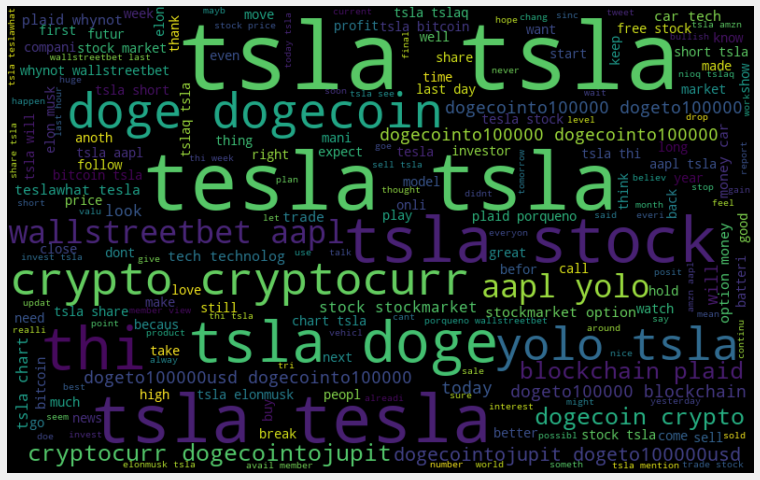

In [ ]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['Text']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

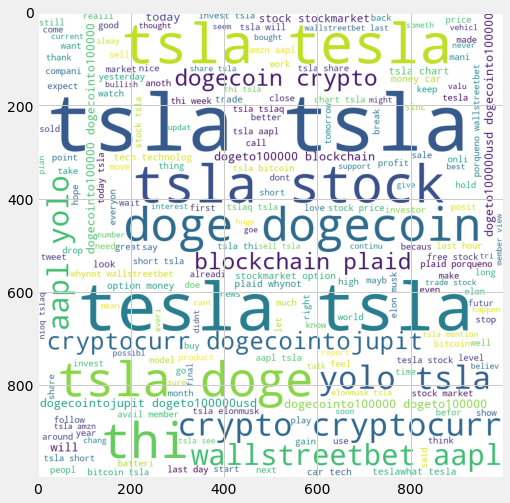

In [ ]:
from wordcloud import WordCloud
allwords= ' '.join(twts for twts in df1['Text'] )
wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate(allwords)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)


#**Sentiment** **Analysis**

In [ ]:
def getSubjectivity(df1):
    return TextBlob(df1).sentiment.subjectivity
def getPolarity(df1):
    return TextBlob(df1).sentiment.polarity

df1['Subjectivity'] = df1['Text'].apply(getSubjectivity)
df1['Polarity'] = df1['Text'].apply(getPolarity)
df1.head()

,Datetime,Text,Subjectivity,Polarity
10805,2020-01-01 00:56:57+00:00,trade decad number go long faang stock begin d...,0.4,-0.05
10804,2020-01-01 01:24:41+00:00,hour chart group instrument avail member view,0.0,0.00
10803,2020-01-01 02:04:14+00:00,commun team 2020 bring even more spectacular i...,0.7,0.55
10802,2020-01-01 04:20:49+00:00,tsla tsla just would have thought thi tradingview,0.0,0.00
10801,2020-01-01 06:20:35+00:00,deliveri announc earn report batterypowertrain...,0.0,0.00


In [ ]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

df1['Analysis'] = df1['Polarity'].apply(getAnalysis)
df1

,Datetime,Text,Subjectivity,Polarity,Analysis
10805,2020-01-01 00:56:57+00:00,trade decad number go long faang stock begin d...,0.400000,-0.05,Negative
10804,2020-01-01 01:24:41+00:00,hour chart group instrument avail member view,0.000000,0.00,Neutral
10803,2020-01-01 02:04:14+00:00,commun team 2020 bring even more spectacular i...,0.700000,0.55,Positive
10802,2020-01-01 04:20:49+00:00,tsla tsla just would have thought thi tradingview,0.000000,0.00,Neutral
10801,2020-01-01 06:20:35+00:00,deliveri announc earn report batterypowertrain...,0.000000,0.00,Neutral
...,...,...,...,...,...
53670,2021-09-20 23:22:28+00:00,dont surpris tsla take lead bullish revers fut...,0.750000,0.80,Positive
53669,2021-09-20 23:39:00+00:00,tsla most mention wallstreetbet over last hour,0.283333,0.25,Positive
53668,Datetime,text,0.000000,0.00,Neutral
10806,Datetime,text,0.000000,0.00,Neutral


Positive number of Tweets

In [ ]:
positive=df1[df1['Analysis']=="Positive"]
print(str(positive.shape[0]/(df.shape[0])*100)+"% of positive tweets")
pos=positive.shape[0]/df.shape[0]*100

31.73523534782781% of positive tweets


Negative number of Tweets

In [ ]:
negative=df1[df1['Analysis']=="Negative"]
print(str(negative.shape[0]/(df.shape[0])*100)+"% of negative tweets")
neg=negative.shape[0]/df.shape[0]*100

12.072410644576479% of negative tweets


Neutral number of Tweets

In [ ]:
neutral=df1[df1['Analysis']=="Neutral"]
print(str(neutral.shape[0]/(df.shape[0])*100)+"% of neutral tweets")
neutral=neutral.shape[0]/df.shape[0]*100

56.1923540075957% of neutral tweets


In [ ]:
explode=(0,0.1,0)
labels='Positive', 'Negative', 'Neutral'
sizes=[pos,neg,neutral]
colors=['yellow','lightcoral','blue']

#**Pie** **chart of Sentiment Percentage**

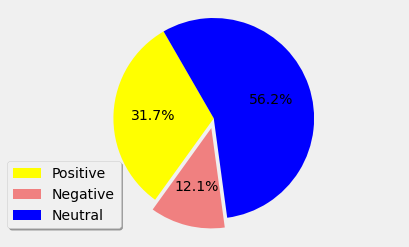

In [ ]:
plt.pie(sizes,explode=explode,colors=colors,autopct='%1.1f%%',startangle=120)
plt.legend(labels, loc=(-0.05,0.05),shadow=True)
plt.axis('equal')
plt.savefig("Sentiment_Anaylsis.png")


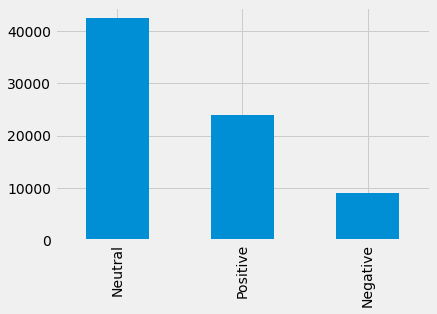

In [ ]:
df1['Analysis'].value_counts()
df1['Analysis'].value_counts().plot(kind = 'bar')
plt.show()


In [ ]:
df2 = pd.get_dummies(df1['Analysis'])
df2

,Negative,Neutral,Positive
10805,1,0,0
10804,0,1,0
10803,0,0,1
10802,0,1,0
10801,0,1,0
...,...,...,...
53670,0,0,1
53669,0,0,1
53668,0,1,0
10806,0,1,0


In [ ]:
df1['Datetime'] = df1['Datetime'].apply(lambda x:x[:19])
a = list(df1["Datetime"].apply(lambda x:len(x)>4))
df1["Date"] = pd.to_datetime(df1["Datetime"],errors="coerce")
df1


,Datetime,Text,Subjectivity,Polarity,Analysis,Date
10805,2020-01-01 00:56:57,trade decad number go long faang stock begin d...,0.400000,-0.05,Negative,2020-01-01 00:56:57
10804,2020-01-01 01:24:41,hour chart group instrument avail member view,0.000000,0.00,Neutral,2020-01-01 01:24:41
10803,2020-01-01 02:04:14,commun team 2020 bring even more spectacular i...,0.700000,0.55,Positive,2020-01-01 02:04:14
10802,2020-01-01 04:20:49,tsla tsla just would have thought thi tradingview,0.000000,0.00,Neutral,2020-01-01 04:20:49
10801,2020-01-01 06:20:35,deliveri announc earn report batterypowertrain...,0.000000,0.00,Neutral,2020-01-01 06:20:35
...,...,...,...,...,...,...
53670,2021-09-20 23:22:28,dont surpris tsla take lead bullish revers fut...,0.750000,0.80,Positive,2021-09-20 23:22:28
53669,2021-09-20 23:39:00,tsla most mention wallstreetbet over last hour,0.283333,0.25,Positive,2021-09-20 23:39:00
53668,Datetime,text,0.000000,0.00,Neutral,NaT
10806,Datetime,text,0.000000,0.00,Neutral,NaT


In [ ]:
df3 = pd.concat([df1,df2],axis=1)
df3

,Datetime,Text,Subjectivity,Polarity,Analysis,Date,Negative,Neutral,Positive
10805,2020-01-01 00:56:57,trade decad number go long faang stock begin d...,0.400000,-0.05,Negative,2020-01-01 00:56:57,1,0,0
10804,2020-01-01 01:24:41,hour chart group instrument avail member view,0.000000,0.00,Neutral,2020-01-01 01:24:41,0,1,0
10803,2020-01-01 02:04:14,commun team 2020 bring even more spectacular i...,0.700000,0.55,Positive,2020-01-01 02:04:14,0,0,1
10802,2020-01-01 04:20:49,tsla tsla just would have thought thi tradingview,0.000000,0.00,Neutral,2020-01-01 04:20:49,0,1,0
10801,2020-01-01 06:20:35,deliveri announc earn report batterypowertrain...,0.000000,0.00,Neutral,2020-01-01 06:20:35,0,1,0
...,...,...,...,...,...,...,...,...,...
53670,2021-09-20 23:22:28,dont surpris tsla take lead bullish revers fut...,0.750000,0.80,Positive,2021-09-20 23:22:28,0,0,1
53669,2021-09-20 23:39:00,tsla most mention wallstreetbet over last hour,0.283333,0.25,Positive,2021-09-20 23:39:00,0,0,1
53668,Datetime,text,0.000000,0.00,Neutral,NaT,0,1,0
10806,Datetime,text,0.000000,0.00,Neutral,NaT,0,1,0


In [ ]:
df3['Year'] = df3['Date'].dt.year
df3['Month'] = df3['Date'].dt.month
df3['Day'] = df3['Date'].dt.day
df3

,Datetime,Text,Subjectivity,Polarity,Analysis,Date,Negative,Neutral,Positive,Year,Month,Day
10805,2020-01-01 00:56:57,trade decad number go long faang stock begin d...,0.400000,-0.05,Negative,2020-01-01 00:56:57,1,0,0,2020.0,1.0,1.0
10804,2020-01-01 01:24:41,hour chart group instrument avail member view,0.000000,0.00,Neutral,2020-01-01 01:24:41,0,1,0,2020.0,1.0,1.0
10803,2020-01-01 02:04:14,commun team 2020 bring even more spectacular i...,0.700000,0.55,Positive,2020-01-01 02:04:14,0,0,1,2020.0,1.0,1.0
10802,2020-01-01 04:20:49,tsla tsla just would have thought thi tradingview,0.000000,0.00,Neutral,2020-01-01 04:20:49,0,1,0,2020.0,1.0,1.0
10801,2020-01-01 06:20:35,deliveri announc earn report batterypowertrain...,0.000000,0.00,Neutral,2020-01-01 06:20:35,0,1,0,2020.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
53670,2021-09-20 23:22:28,dont surpris tsla take lead bullish revers fut...,0.750000,0.80,Positive,2021-09-20 23:22:28,0,0,1,2021.0,9.0,20.0
53669,2021-09-20 23:39:00,tsla most mention wallstreetbet over last hour,0.283333,0.25,Positive,2021-09-20 23:39:00,0,0,1,2021.0,9.0,20.0
53668,Datetime,text,0.000000,0.00,Neutral,NaT,0,1,0,NaN,NaN,NaN
10806,Datetime,text,0.000000,0.00,Neutral,NaT,0,1,0,NaN,NaN,NaN


In [ ]:
df3.insert(3, 'StockName', 'TESLA')
df3

,Datetime,Text,Subjectivity,StockName,Polarity,Analysis,Date,Negative,Neutral,Positive,Year,Month,Day
10805,2020-01-01 00:56:57,trade decad number go long faang stock begin d...,0.400000,TESLA,-0.05,Negative,2020-01-01 00:56:57,1,0,0,2020.0,1.0,1.0
10804,2020-01-01 01:24:41,hour chart group instrument avail member view,0.000000,TESLA,0.00,Neutral,2020-01-01 01:24:41,0,1,0,2020.0,1.0,1.0
10803,2020-01-01 02:04:14,commun team 2020 bring even more spectacular i...,0.700000,TESLA,0.55,Positive,2020-01-01 02:04:14,0,0,1,2020.0,1.0,1.0
10802,2020-01-01 04:20:49,tsla tsla just would have thought thi tradingview,0.000000,TESLA,0.00,Neutral,2020-01-01 04:20:49,0,1,0,2020.0,1.0,1.0
10801,2020-01-01 06:20:35,deliveri announc earn report batterypowertrain...,0.000000,TESLA,0.00,Neutral,2020-01-01 06:20:35,0,1,0,2020.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53670,2021-09-20 23:22:28,dont surpris tsla take lead bullish revers fut...,0.750000,TESLA,0.80,Positive,2021-09-20 23:22:28,0,0,1,2021.0,9.0,20.0
53669,2021-09-20 23:39:00,tsla most mention wallstreetbet over last hour,0.283333,TESLA,0.25,Positive,2021-09-20 23:39:00,0,0,1,2021.0,9.0,20.0
53668,Datetime,text,0.000000,TESLA,0.00,Neutral,NaT,0,1,0,NaN,NaN,NaN
10806,Datetime,text,0.000000,TESLA,0.00,Neutral,NaT,0,1,0,NaN,NaN,NaN


In [ ]:
df3['Total Tweets'] = df3['Positive']+  df3['Negative']+  df3['Neutral']
df3

,Datetime,Text,Subjectivity,StockName,Polarity,Analysis,Date,Negative,Neutral,Positive,Year,Month,Day,Total Tweets
10805,2020-01-01 00:56:57,trade decad number go long faang stock begin d...,0.400000,TESLA,-0.05,Negative,2020-01-01 00:56:57,1,0,0,2020.0,1.0,1.0,1
10804,2020-01-01 01:24:41,hour chart group instrument avail member view,0.000000,TESLA,0.00,Neutral,2020-01-01 01:24:41,0,1,0,2020.0,1.0,1.0,1
10803,2020-01-01 02:04:14,commun team 2020 bring even more spectacular i...,0.700000,TESLA,0.55,Positive,2020-01-01 02:04:14,0,0,1,2020.0,1.0,1.0,1
10802,2020-01-01 04:20:49,tsla tsla just would have thought thi tradingview,0.000000,TESLA,0.00,Neutral,2020-01-01 04:20:49,0,1,0,2020.0,1.0,1.0,1
10801,2020-01-01 06:20:35,deliveri announc earn report batterypowertrain...,0.000000,TESLA,0.00,Neutral,2020-01-01 06:20:35,0,1,0,2020.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53670,2021-09-20 23:22:28,dont surpris tsla take lead bullish revers fut...,0.750000,TESLA,0.80,Positive,2021-09-20 23:22:28,0,0,1,2021.0,9.0,20.0,1
53669,2021-09-20 23:39:00,tsla most mention wallstreetbet over last hour,0.283333,TESLA,0.25,Positive,2021-09-20 23:39:00,0,0,1,2021.0,9.0,20.0,1
53668,Datetime,text,0.000000,TESLA,0.00,Neutral,NaT,0,1,0,NaN,NaN,NaN,1
10806,Datetime,text,0.000000,TESLA,0.00,Neutral,NaT,0,1,0,NaN,NaN,NaN,1


In [ ]:
df3 = df3.drop(['Text', 'Subjectivity','Polarity',	'Analysis',	'Datetime'],axis=1)
df3

,StockName,Date,Negative,Neutral,Positive,Year,Month,Day,Total Tweets
10805,TESLA,2020-01-01 00:56:57,1,0,0,2020.0,1.0,1.0,1
10804,TESLA,2020-01-01 01:24:41,0,1,0,2020.0,1.0,1.0,1
10803,TESLA,2020-01-01 02:04:14,0,0,1,2020.0,1.0,1.0,1
10802,TESLA,2020-01-01 04:20:49,0,1,0,2020.0,1.0,1.0,1
10801,TESLA,2020-01-01 06:20:35,0,1,0,2020.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...
53670,TESLA,2021-09-20 23:22:28,0,0,1,2021.0,9.0,20.0,1
53669,TESLA,2021-09-20 23:39:00,0,0,1,2021.0,9.0,20.0,1
53668,TESLA,NaT,0,1,0,NaN,NaN,NaN,1
10806,TESLA,NaT,0,1,0,NaN,NaN,NaN,1
